In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

#from sklearn.multioutput import MultiOutputClassifier
#from sklearn.compose import make_column_transformer
#from sklearn import set_config
#from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_excel("tour_de_france.xlsx")
df.head() # first five lines of data

,Year,Winner's avg speed,Total distance (km),Number of stages,Finishers,Entrants,Winner,Winner's Nationality,Winner's Team,Start Date,End Date,Starting city,Starting city Latitude,Starting city Longitude,Starting country,Finishing city,Finishing city Latitude,Finishing city Longitude
0,1903,25.68,2428.0,6,21,60,Maurice Garin,France,La Française,1903-07-01,1903-07-21,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
1,1904,25.27,2420.0,6,27,88,Henri Cornet,France,Cycles JC,1904-07-02,1904-07-24,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
2,1905,27.11,2994.0,11,24,60,Louis Trousselier,France,Cycles Peugeot,1905-07-09,1905-07-30,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
3,1906,24.46,4545.0,13,14,82,René Pottier,France,Cycles Peugeot,1906-07-04,1906-07-29,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
4,1907,28.47,4488.0,14,33,93,Lucien Petit-Breton,France,Cycles Peugeot,1907-07-08,1907-08-04,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522


In [3]:
df.info() #concise summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Year                      103 non-null    int64         
 1   Winner's avg speed        103 non-null    float64       
 2   Total distance (km)       103 non-null    float64       
 3   Number of stages          103 non-null    int64         
 4   Finishers                 103 non-null    int64         
 5   Entrants                  103 non-null    int64         
 6   Winner                    103 non-null    object        
 7   Winner's Nationality      103 non-null    object        
 8   Winner's Team             103 non-null    object        
 9   Start Date                103 non-null    datetime64[ns]
 10  End Date                  103 non-null    datetime64[ns]
 11  Starting city             103 non-null    object        
 12  Starting city Latitude

In [4]:
df.describe() #summary stats about the data

,Year,Winner's avg speed,Total distance (km),Number of stages,Finishers,Entrants,Start Date,End Date,Starting city Latitude,Starting city Longitude,Finishing city Latitude,Finishing city Longitude
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103,103,103.000000,103.000000,1.030000e+02,1.030000e+02
mean,1962.291262,34.057243,4236.823301,20.097087,87.825243,141.631068,1962-10-14 20:16:18.640776704,1962-11-07 17:14:33.786407776,48.723115,2.529380,4.885660e+01,2.352200e+00
min,1903.000000,24.060000,2420.000000,6.000000,10.000000,60.000000,1903-07-01 00:00:00,1903-07-21 00:00:00,41.591400,-6.260300,4.885660e+01,2.352200e+00
25%,1932.500000,29.460000,3674.000000,20.000000,49.000000,117.500000,1932-12-31 00:00:00,1933-01-25 12:00:00,48.296450,1.100000,4.885660e+01,2.352200e+00
50%,1965.000000,35.420000,4177.000000,21.000000,82.000000,132.000000,1965-06-22 00:00:00,1965-07-14 00:00:00,48.856600,2.352200,4.885660e+01,2.352200e+00
75%,1990.500000,38.730000,4660.500000,22.000000,131.000000,180.000000,1991-01-01 12:00:00,1991-01-23 12:00:00,49.188800,4.461150,4.885660e+01,2.352200e+00
max,2016.000000,41.650000,5745.000000,25.000000,174.000000,210.000000,2016-07-02 00:00:00,2016-07-21 00:00:00,53.857800,13.405000,4.885660e+01,2.352200e+00
std,33.330676,5.190367,696.994425,3.516110,45.262075,40.308368,NaN,NaN,2.023238,3.263372,5.712138e-14,3.570086e-15


In [5]:
# handling missing values
df_missing_values = df.isnull().sum()
print(df_missing_values)  # Display columns with missing values

Year                        0
Winner's avg speed          0
Total distance (km)         0
Number of stages            0
Finishers                   0
Entrants                    0
Winner                      0
Winner's Nationality        0
Winner's Team               0
Start Date                  0
End Date                    0
Starting city               0
Starting city Latitude      0
Starting city Longitude     0
Starting country            0
Finishing city              0
Finishing city Latitude     0
Finishing city Longitude    0
dtype: int64


In [6]:
#Removing missing values rows
df.dropna()

# drop rows
df.drop_duplicates()

,Year,Winner's avg speed,Total distance (km),Number of stages,Finishers,Entrants,Winner,Winner's Nationality,Winner's Team,Start Date,End Date,Starting city,Starting city Latitude,Starting city Longitude,Starting country,Finishing city,Finishing city Latitude,Finishing city Longitude
0,1903,25.680,2428.0,6,21,60,Maurice Garin,France,La Française,1903-07-01,1903-07-21,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
1,1904,25.270,2420.0,6,27,88,Henri Cornet,France,Cycles JC,1904-07-02,1904-07-24,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
2,1905,27.110,2994.0,11,24,60,Louis Trousselier,France,Cycles Peugeot,1905-07-09,1905-07-30,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
3,1906,24.460,4545.0,13,14,82,René Pottier,France,Cycles Peugeot,1906-07-04,1906-07-29,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
4,1907,28.470,4488.0,14,33,93,Lucien Petit-Breton,France,Cycles Peugeot,1907-07-08,1907-08-04,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2012,39.880,3496.9,20,153,198,Bradley Wiggins,United Kingdom,Team Sky,2012-06-30,2012-07-22,Liège,50.6326,5.5797,Belgium,Paris,48.8566,2.3522
99,2013,40.540,3403.5,21,169,198,Chris Froome,United Kingdom,Team Sky,2013-06-29,2013-07-21,Porto Vecchio,41.5914,9.2783,France,Paris,48.8566,2.3522
100,2014,40.690,3659.0,21,164,198,Vincenzo Nibali,Italy,Astana,2014-07-05,2014-07-27,Leeds,53.8578,-1.5023,United Kingdom,Paris,48.8566,2.3522
101,2015,39.640,3360.3,21,160,198,Chris Froome,United Kingdom,Team Sky,2015-07-04,2015-07-26,Utrecht,52.0907,5.1214,Netherlands,Paris,48.8566,2.3522


In [7]:
# Convert dates
df['Start Date'] = pd.to_datetime(df['Start Date'])
df['End Date'] = pd.to_datetime(df['End Date'])

In [8]:
#imputation
#make a list for numerical column
columns_to_scale = [
    "Winner's avg speed", 
    "Total distance (km)", 
    "Number of stages", 
    "Finishers", 
    "Entrants"
]
# fill in mean imputation for numerical columns
for column in columns_to_scale:
    df[column].fillna(df[column].mean())

In [9]:
#make a list for categorical column
columns_to_impute = [
    'Winner', 
    'Winner\'s Nationality', 
    'Winner\'s Team', 
    'Starting country', 
    'Starting city',
    'Finishing city'
]
# fill in mode imputation categorical columns
for col in columns_to_impute:
    df[col].fillna(df[col].mode()[0])

In [10]:
#verify the missing values 
df_missing_values_after = df.isnull().sum()
print(df_missing_values_after)

Year                        0
Winner's avg speed          0
Total distance (km)         0
Number of stages            0
Finishers                   0
Entrants                    0
Winner                      0
Winner's Nationality        0
Winner's Team               0
Start Date                  0
End Date                    0
Starting city               0
Starting city Latitude      0
Starting city Longitude     0
Starting country            0
Finishing city              0
Finishing city Latitude     0
Finishing city Longitude    0
dtype: int64


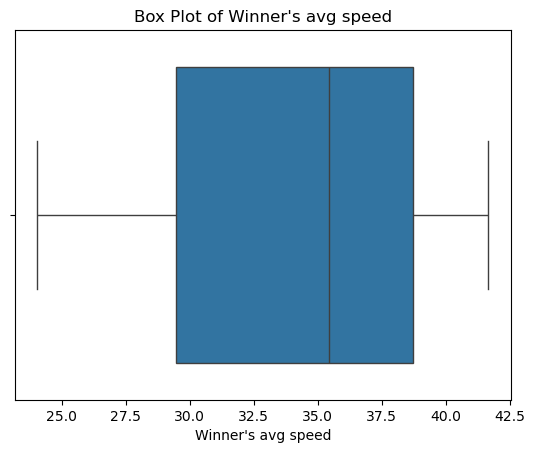

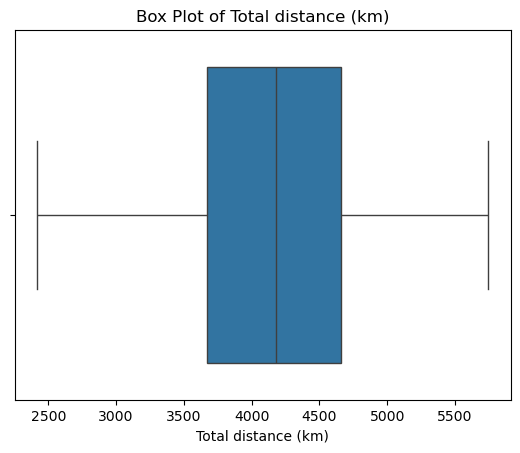

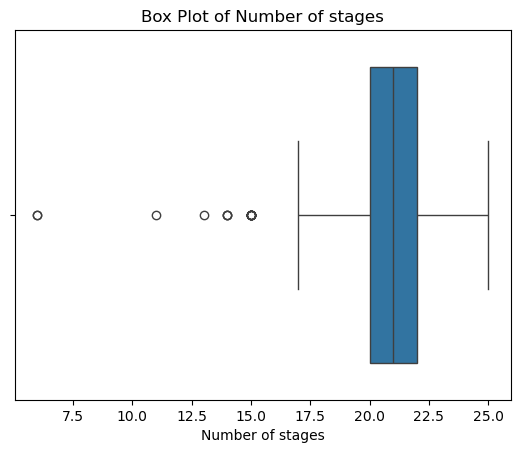

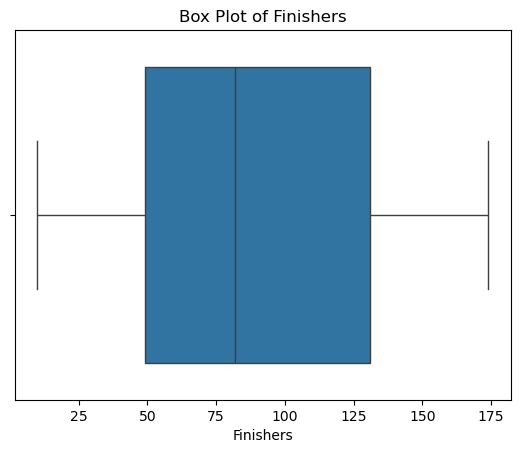

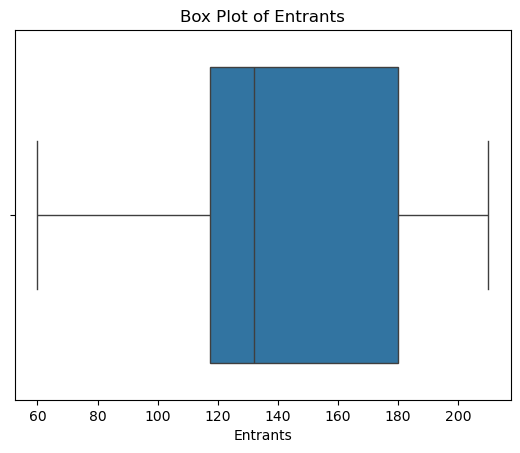

In [11]:
### handle outliers ###
for c in columns_to_scale:
    sns.boxplot(x=df[c])
    plt.title(f'Box Plot of {c}')
    plt.show()

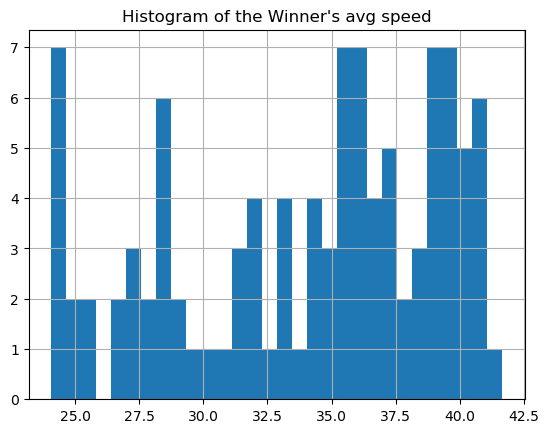

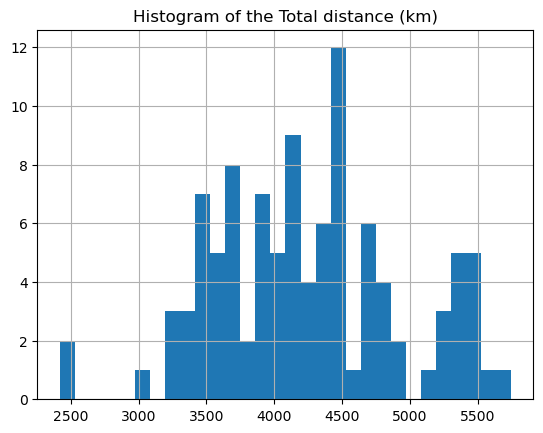

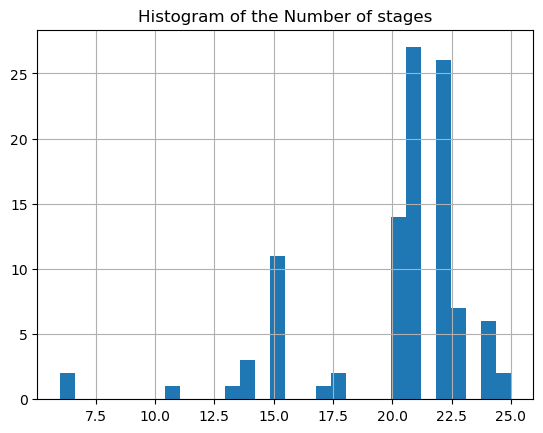

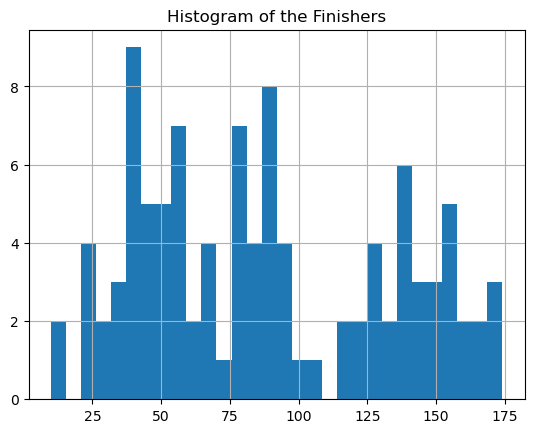

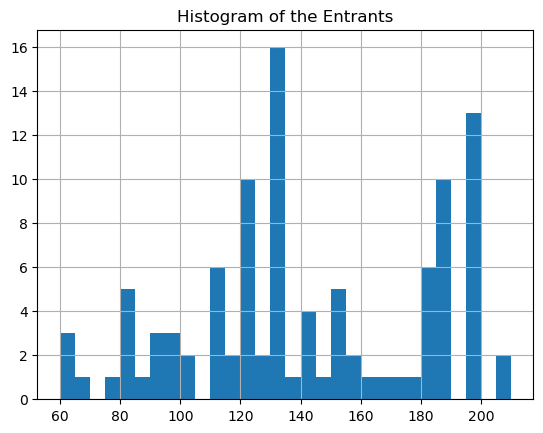

In [12]:
 for col in columns_to_scale:
    df[col].hist(bins=30)
    plt.title(f'Histogram of the {col}')
    plt.show()

In [13]:
# z-score
# Calculate Z-scores
z_scores = stats.zscore(df[columns_to_scale])

# Identify outliers
outliers_z = df[(z_scores > 3) | (z_scores < -3)]
print("Outliers based on Z-score:")
print(outliers_z)

Outliers based on Z-score:
     Year  Winner's avg speed  Total distance (km)  Number of stages  \
0     NaN                 NaN                  NaN               6.0   
1     NaN                 NaN                  NaN               6.0   
2     NaN                 NaN                  NaN               NaN   
3     NaN                 NaN                  NaN               NaN   
4     NaN                 NaN                  NaN               NaN   
..    ...                 ...                  ...               ...   
98    NaN                 NaN                  NaN               NaN   
99    NaN                 NaN                  NaN               NaN   
100   NaN                 NaN                  NaN               NaN   
101   NaN                 NaN                  NaN               NaN   
102   NaN                 NaN                  NaN               NaN   

     Finishers  Entrants Winner Winner's Nationality Winner's Team Start Date  \
0          NaN       NaN   

In [14]:
# Interquartile Range
Q1 = df[columns_to_scale].quantile(0.25)
Q3 = df[columns_to_scale].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR

# drop the upper 10%
for num in columns_to_scale:
    dropIndexes = df[df[num]>df[num].max() * 9/10].index
    outliers = df[(df[columns_to_scale]<lower_bound) | (df[columns_to_scale]>upper_bound)]

print(outliers)

df.drop(dropIndexes)

     Year  Winner's avg speed  Total distance (km)  Number of stages  \
0     NaN              25.680                  NaN               6.0   
1     NaN              25.270                  NaN               6.0   
2     NaN              27.110                  NaN              11.0   
3     NaN                 NaN               4545.0              13.0   
4     NaN              28.470               4488.0              14.0   
..    ...                 ...                  ...               ...   
98    NaN              39.880               3496.9              20.0   
99    NaN              40.540               3403.5              21.0   
100   NaN              40.690               3659.0              21.0   
101   NaN              39.640               3360.3              21.0   
102   NaN              39.616               3534.0              21.0   

     Finishers  Entrants Winner Winner's Nationality Winner's Team Start Date  \
0           21       NaN    NaN                  NaN  

,Year,Winner's avg speed,Total distance (km),Number of stages,Finishers,Entrants,Winner,Winner's Nationality,Winner's Team,Start Date,End Date,Starting city,Starting city Latitude,Starting city Longitude,Starting country,Finishing city,Finishing city Latitude,Finishing city Longitude
0,1903,25.68,2428.0,6,21,60,Maurice Garin,France,La Française,1903-07-01,1903-07-21,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
1,1904,25.27,2420.0,6,27,88,Henri Cornet,France,Cycles JC,1904-07-02,1904-07-24,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
2,1905,27.11,2994.0,11,24,60,Louis Trousselier,France,Cycles Peugeot,1905-07-09,1905-07-30,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
3,1906,24.46,4545.0,13,14,82,René Pottier,France,Cycles Peugeot,1906-07-04,1906-07-29,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
4,1907,28.47,4488.0,14,33,93,Lucien Petit-Breton,France,Cycles Peugeot,1907-07-08,1907-08-04,Paris,48.8566,2.3522,France,Paris,48.8566,2.3522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2005,41.65,3608.0,21,155,189,Results voided,Results voided,Results voided,2005-07-02,2005-07-24,Fromentine,46.8892,-2.1400,France,Paris,48.8566,2.3522
92,2006,40.78,3657.1,20,139,176,Oscar Pereiro,Spain,Caisse d'Epargne,2006-07-01,2006-07-23,Strasbourg,48.5734,7.7521,France,Paris,48.8566,2.3522
93,2007,38.98,3547.0,20,141,189,Alberto Contador,Spain,Discovery Channel,2007-07-07,2007-07-29,London,51.5074,0.1278,France,Paris,48.8566,2.3522
94,2008,40.50,3559.5,21,145,180,Carlos Sastre,Spain,CSC,2008-07-05,2008-07-27,Brest,48.3904,-4.4861,France,Paris,48.8566,2.3522


In [15]:
# Step 1: Scale numeric columns
scaler = StandardScaler()

# Fit and transform the numeric columns only if they are not empty
if not df[columns_to_scale].empty:
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
else:
    print("No numeric data to scale.")

# Step 2: Verify the processed data
print(df.head())  # View the first few rows after processing

   Year  Winner's avg speed  Total distance (km)  Number of stages  Finishers  \
0  1903           -1.621891            -2.607867         -4.028890  -1.483627   
1  1904           -1.701269            -2.619401         -4.028890  -1.350417   
2  1905           -1.345033            -1.791837         -2.599911  -1.417022   
3  1906           -1.858091             0.444313         -2.028319  -1.639038   
4  1907           -1.081728             0.362133         -1.742523  -1.217208   

   Entrants               Winner Winner's Nationality   Winner's Team  \
0 -2.035067        Maurice Garin               France    La Française   
1 -1.337026         Henri Cornet               France       Cycles JC   
2 -2.035067    Louis Trousselier               France  Cycles Peugeot   
3 -1.486606         René Pottier               France  Cycles Peugeot   
4 -1.212375  Lucien Petit-Breton               France  Cycles Peugeot   

  Start Date   End Date Starting city  Starting city Latitude  \
0 1903-07

In [16]:
#One_hot_encoder
# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # Set sparse_output=False to get a clean array

# Fit and transform the categorical column
encoded_columns_to_impute = encoder.fit_transform(df[columns_to_impute])

# Create a DataFrame with the new encoded columns
encoded_new_impute_df = pd.DataFrame(encoded_columns_to_impute, columns=encoder.get_feature_names_out(columns_to_impute))

# Concatenate the encoded columns back to the original df (or just use the encoded)
df_encoded = pd.concat([df.drop(columns_to_impute, axis=1), encoded_new_impute_df], axis=1)

# View the result
print(df_encoded.head())

   Year  Winner's avg speed  Total distance (km)  Number of stages  Finishers  \
0  1903           -1.621891            -2.607867         -4.028890  -1.483627   
1  1904           -1.701269            -2.619401         -4.028890  -1.350417   
2  1905           -1.345033            -1.791837         -2.599911  -1.417022   
3  1906           -1.858091             0.444313         -2.028319  -1.639038   
4  1907           -1.081728             0.362133         -1.742523  -1.217208   

   Entrants Start Date   End Date  Starting city Latitude  \
0 -2.035067 1903-07-01 1903-07-21                 48.8566   
1 -1.337026 1904-07-02 1904-07-24                 48.8566   
2 -2.035067 1905-07-09 1905-07-30                 48.8566   
3 -1.486606 1906-07-04 1906-07-29                 48.8566   
4 -1.212375 1907-07-08 1907-08-04                 48.8566   

   Starting city Longitude  ...  Starting city_Rouen  \
0                   2.3522  ...                  0.0   
1                   2.3522  ...   

In [17]:
#Drop rows with missing values for simplicity
#df.dropna(subset=['Start Date', 'End Date', 'Total distance (km)', "Winner's country"], inplace=True)

# Convert start and end to datetime and calculate total time
df['Total_time'] = pd.to_datetime(df['End Date']) - pd.to_datetime(df['Start Date'])

# Convert Total_time to hours (as speed is usually in km/h)
df['Total_time_hours'] = df['Total_time'].dt.total_seconds() / 60

# Calculate average speed (km/h)
df["Winner's avg speed"] = df['Total distance (km)'] / df['Total_time_hours']

print(df['Total_time_hours'])

0      28800.0
1      31680.0
2      30240.0
3      36000.0
4      38880.0
        ...   
98     31680.0
99     31680.0
100    31680.0
101    31680.0
102    27360.0
Name: Total_time_hours, Length: 103, dtype: float64


In [20]:
# Data Modeling and training
features = ['Total distance (km)', 'Total_time_hours', "Winner's avg speed", 'Year', 'Number of stages']

X = df[features]

# Encode target
le = LabelEncoder()
y = le.fit_transform(df["Winner"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=1)) #sets undefined precision/recall to 1

Accuracy: 0.23809523809523808

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
MSE:  866.2380952380952

Classification Report:
               precision    recall  f1-score   support

           3       0.00      1.00      0.00         0
           4       0.00      1.00      0.00         0
           8       0.50      1.00      0.67         1
           9       0.00      1.00      0.00         0
          13       1.00      0.00      0.00         1
          16       0.00      1.00      0.00         0
          21       0.00      1.00      0.00         0
          22       1.00      0.00      0.00         1
          25       1.00      0.00      0.00         1
          29       1.00      0.00      0.00         1
          30       1.00      0.00      0.00         1
          32       1.00      0.00      0.00         1
          35       0.00      1.00      0.00         0
          39       1.00 

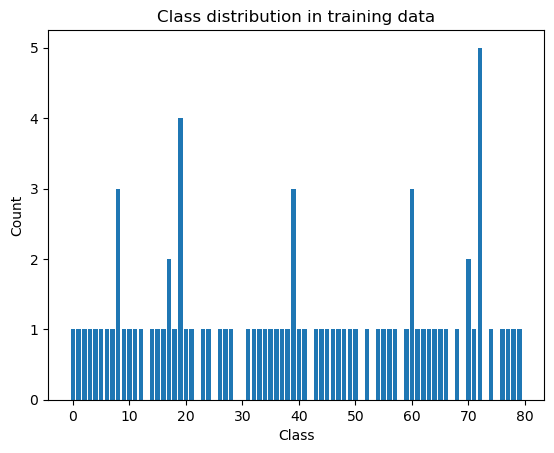

In [21]:
#Check how balanced your target variable is
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.title("Class distribution in training data")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

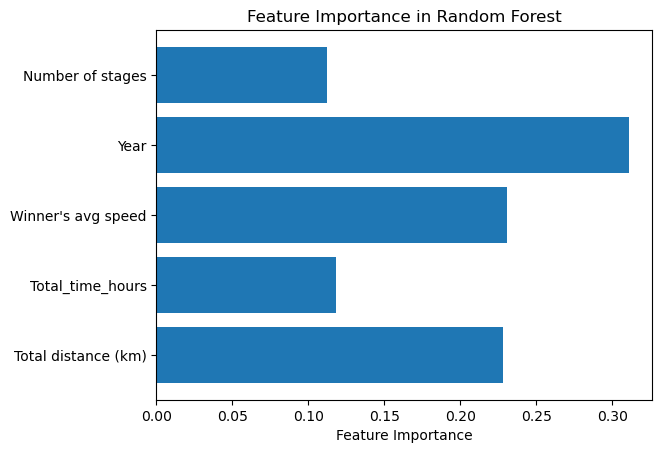

In [22]:
importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.show()

In [26]:
scores = cross_val_score(model, X, y, cv=2)
print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.15535444947209653


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
